<a href="https://colab.research.google.com/github/phucvan-coder/BTC_Price_Prediction_Model/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries for managing and visualizing dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/BTC-USD.csv'

In [ ]:
#display floats with 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

#expand display limits
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [ ]:
#read BTC-USD sample dataset and turn Date column into index column of dataframe
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date', dayfirst=True)
#display dataset
print(df)

                Open      High       Low     Close  Adj Close  \
Date                                                            
2019-10-13  8,336.90  8,470.99  8,276.61  8,321.01   8,321.01   
2019-10-14  8,320.83  8,390.21  8,284.13  8,374.69   8,374.69   
2019-10-15  8,373.46  8,410.71  8,182.71  8,205.37   8,205.37   
2019-10-16  8,204.67  8,216.81  7,985.09  8,047.53   8,047.53   
2019-10-17  8,047.81  8,134.83  8,000.94  8,103.91   8,103.91   
...              ...       ...       ...       ...        ...   
2021-10-09 53,929.78 55,397.95 53,735.14 54,968.22  54,968.22   
2021-10-10 54,952.82 56,401.30 54,264.26 54,771.58  54,771.58   
2021-10-11 54,734.12 57,793.04 54,519.77 57,484.79  57,484.79   
2021-10-12 57,526.83 57,627.88 54,477.97 56,041.06  56,041.06   
2021-10-13 55,990.31 56,445.09 55,167.20 55,302.80  55,302.80   

                      Volume  
Date                          
2019-10-13 13,808,286,059.00  
2019-10-14 15,151,387,859.00  
2019-10-15 15,220,412,632.00  

In [ ]:
#display first 5 observations
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-13,"8,336.90","8,470.99","8,276.61","8,321.01","8,321.01","13,808,286,059.00"
2019-10-14,"8,320.83","8,390.21","8,284.13","8,374.69","8,374.69","15,151,387,859.00"
2019-10-15,"8,373.46","8,410.71","8,182.71","8,205.37","8,205.37","15,220,412,632.00"
2019-10-16,"8,204.67","8,216.81","7,985.09","8,047.53","8,047.53","16,071,646,996.00"
2019-10-17,"8,047.81","8,134.83","8,000.94","8,103.91","8,103.91","14,313,052,244.00"


In [ ]:
#display last 5 observations
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-09,"53,929.78","55,397.95","53,735.14","54,968.22","54,968.22","32,491,211,414.00"
2021-10-10,"54,952.82","56,401.30","54,264.26","54,771.58","54,771.58","39,527,792,364.00"
2021-10-11,"54,734.12","57,793.04","54,519.77","57,484.79","57,484.79","42,637,331,698.00"
2021-10-12,"57,526.83","57,627.88","54,477.97","56,041.06","56,041.06","41,083,758,949.00"
2021-10-13,"55,990.31","56,445.09","55,167.20","55,302.80","55,302.80","40,229,584,896.00"


In [ ]:
#rows and columns of dataset
df.shape

(732, 6)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,728.00,728.00,728.00,728.00,728.00,728.00
mean,"24,008.85","24,694.45","23,275.27","24,070.90","24,070.90","38,223,146,983.13"
std,"18,009.60","18,567.73","17,372.97","18,037.15","18,037.15","21,391,808,624.66"
min,"5,002.58","5,331.83","4,106.98","4,970.79","4,970.79","12,252,601,475.00"
25%,"9,166.50","9,281.80","9,040.56","9,176.78","9,176.78","24,084,561,500.50"
50%,"11,872.36","12,031.53","11,686.39","11,878.24","11,878.24","34,274,559,074.50"
75%,"39,333.11","40,823.69","37,637.39","39,380.02","39,380.02","46,680,147,621.50"
max,"63,523.75","64,863.10","62,208.96","63,503.46","63,503.46","350,967,941,479.00"


In [ ]:
#check null values in features
df.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [ ]:
#calculating sum of null values in each feature
df.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

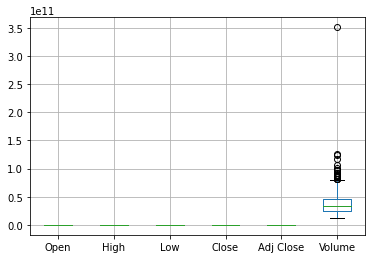

In [ ]:
#Plotting boxplot to check if there are any outliers in every feature of dataset
#there are outliers in Volume column
df.boxplot()
plt.show()

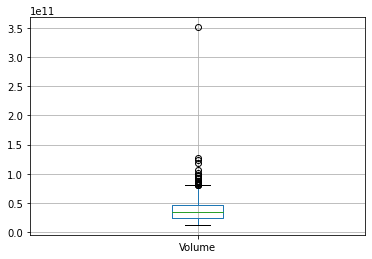

In [ ]:
df[['Volume']].boxplot()
plt.show()

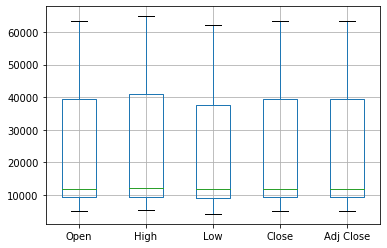

In [ ]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].boxplot()
plt.show()

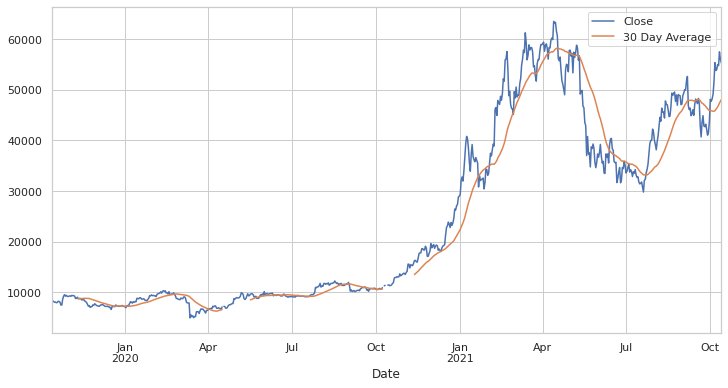

In [ ]:
#we plot the average of close price in 30 days, compared with the close price
sns.set()
sns.set_style('whitegrid')
df['Close'].plot(figsize=(12, 6), label='Close')
df['Close'].rolling(window=30).mean().plot(label='30 Day Average')
plt.legend()

#Solving missing values

In [ ]:
#solving missing values
df.dropna(inplace=True)

In [ ]:
#check null values in features
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

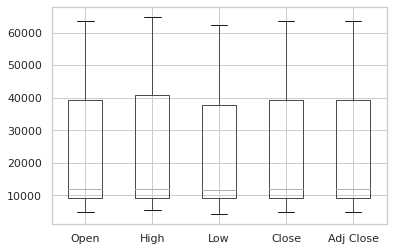

In [ ]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].boxplot()
plt.show()

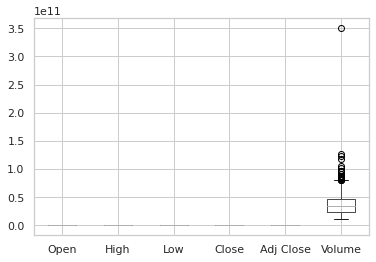

In [ ]:
#Plotting boxplot to check if there are any outliers in every feature of dataset
#there are outliers in Volume column
df.boxplot()
plt.show()

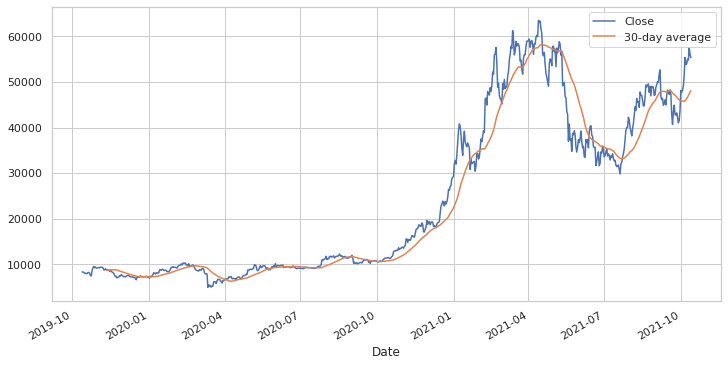

In [ ]:
#Visualizing again the average of close price in 30 days and close price to check
#dataset after we drop missing values
#we can see that there are some changes in the graph
sns.set()
sns.set_style('whitegrid')
df['Close'].plot(figsize=(12, 6), label='Close')
df['Close'].rolling(window=30).mean().plot(label='30-day average')
plt.legend()

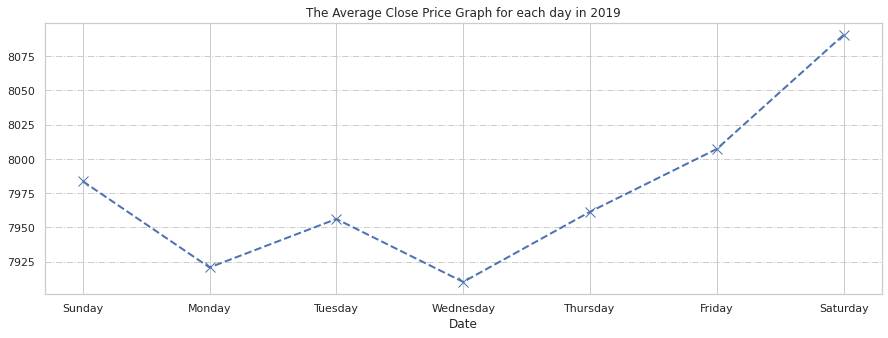

In [ ]:
#The average close price graph for each day in 2019
df['Close'].loc['2019'].groupby(by=df['Close'].loc['2019'].
                                  index.dayofweek).mean().plot(figsize=(15, 5),
                                                               style=['--x'],
                                                               Linewidth=2,
                                                               markersize=10)
plt.grid(True, axis='y', linestyle='-.')
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('The Average Close Price Graph for each day in 2019')
plt.show()

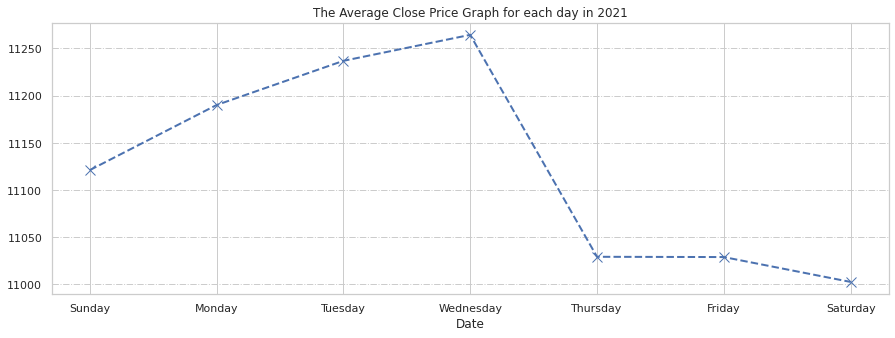

In [ ]:
#The average close price graph for each day in 2020
df['Close'].loc['2020'].groupby(by=df['Close'].loc['2020'].
                                  index.dayofweek).mean().plot(figsize=(15, 5),
                                                               style=['--x'],
                                                               Linewidth=2,
                                                               markersize=10)
plt.grid(True, axis='y', linestyle='-.')
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('The Average Close Price Graph for each day in 2021')
plt.show()

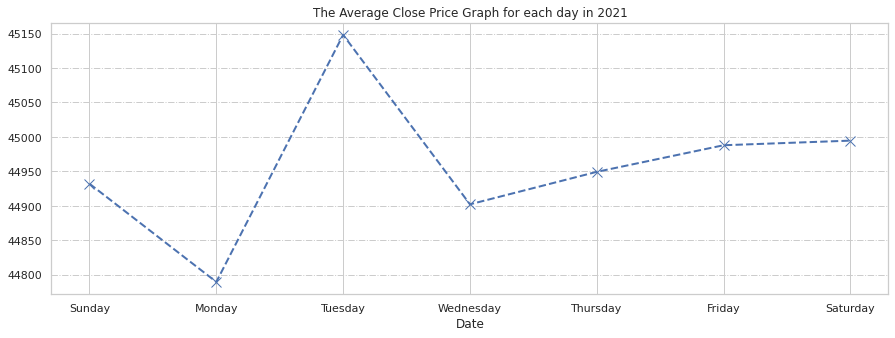

In [ ]:
#The average close price graph for each day in 2021
df['Close'].loc['2021'].groupby(by=df['Close'].loc['2021'].
                                  index.dayofweek).mean().plot(figsize=(15, 5),
                                                               style=['--x'],
                                                               Linewidth=2,
                                                               markersize=10)
plt.grid(True, axis='y', linestyle='-.')
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('The Average Close Price Graph for each day in 2021')
plt.show()

In [ ]:
#Now we get the values from the 30th position til the end of Close column and put
#them in Price_After_Month column
df['Price_After_Month']=df['Close'].shift(-30)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price_After_Month
Date,,,,,,,
2019-10-13,"8,336.90","8,470.99","8,276.61","8,321.01","8,321.01","13,808,286,059.00","8,815.66"
2019-10-14,"8,320.83","8,390.21","8,284.13","8,374.69","8,374.69","15,151,387,859.00","8,808.26"
2019-10-15,"8,373.46","8,410.71","8,182.71","8,205.37","8,205.37","15,220,412,632.00","8,708.09"
2019-10-16,"8,204.67","8,216.81","7,985.09","8,047.53","8,047.53","16,071,646,996.00","8,491.99"
2019-10-17,"8,047.81","8,134.83","8,000.94","8,103.91","8,103.91","14,313,052,244.00","8,550.76"


In [ ]:
#We can see there are missing values at the bottom of Price_After_Month column
#because we ignored 30 values at the top of Close column
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Price_After_Month
Date,,,,,,,
2021-10-09,"53,929.78","55,397.95","53,735.14","54,968.22","54,968.22","32,491,211,414.00",nan
2021-10-10,"54,952.82","56,401.30","54,264.26","54,771.58","54,771.58","39,527,792,364.00",nan
2021-10-11,"54,734.12","57,793.04","54,519.77","57,484.79","57,484.79","42,637,331,698.00",nan
2021-10-12,"57,526.83","57,627.88","54,477.97","56,041.06","56,041.06","41,083,758,949.00",nan
2021-10-13,"55,990.31","56,445.09","55,167.20","55,302.80","55,302.80","40,229,584,896.00",nan


In [ ]:
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Price_After_Month    30
dtype: int64

In [ ]:
#Now we will preprocessing data and we will use the mean removal method 
#to remove a mean from every feature so that it could center on zero
#It also helps to remove bias from the feature
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop('Price_After_Month', axis=1).values
X=preprocessing.scale(X)
y=df['Price_After_Month'].values

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
#Now the mean of every feature in input date is almost equal 0
X.mean(axis=0)

array([ 8.14375628e-17, -8.14375628e-17,  0.00000000e+00, -8.14375628e-17,
       -8.14375628e-17, -4.07187814e-17])

In [ ]:
#standarn deviation (độ lệch chuẩn)
X.std()

1.0

In [ ]:
#We will split the dataset into 2 parts, 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor(n_estimators=500,random_state=42, max_features=0.3, max_depth=10, min_samples_leaf=3)
#fit the model
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#calculating the importance of feature
reg.feature_importances_

array([0.18638077, 0.19487721, 0.17472915, 0.17549608, 0.19772273,
       0.07079407])

<BarContainer object of 6 artists>

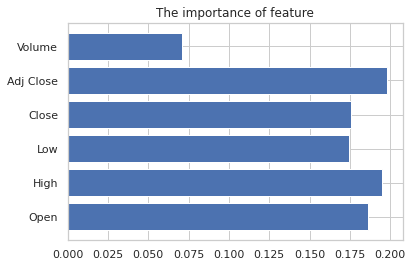

In [ ]:
plt.title('The importance of feature')
plt.barh(['Open','High', 'Low', 'Close', 'Adj Close', 'Volume'], reg.feature_importances_)

In [ ]:
reg=RandomForestRegressor(n_estimators=500,random_state=42, max_features=0.3, max_depth=10, min_samples_leaf=3)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#set up arrays to store n_estimators, training and testing accuracies
estimators = np.arange(1, 500)
train_R_Squared = np.empty(len(estimators))
test_R_Squared = np.empty(len(estimators))

for i, n in enumerate(estimators):

    #set up randomforest with n_estimators
    reg=RandomForestRegressor(n_estimators=n,random_state=42, max_features=0.3, max_depth=10, min_samples_leaf=3)
    #fit the model
    reg.fit(X_train,y_train)

    #computing R squared on the training set
    train_R_Squared[i] = reg.score(X_train, y_train)

    #computing R squared on the test set
    test_R_Squared[i] = reg.score(X_test, y_test)

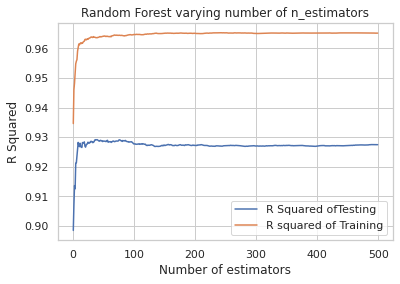

In [ ]:
#Now we are showing the line graph about testing accuracy and training accuracy
plt.title('Random Forest varying number of n_estimators')
plt.plot(estimators, test_R_Squared, label='R Squared ofTesting')
plt.plot(estimators, train_R_Squared, label='R squared of Training')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('R Squared')
plt.show()

In [ ]:
result_test = reg.score(X_test, y_test)
result_train = reg.score(X_train, y_train)
print('R Squared of testing = ', result_test)
print('R squared of training = ', result_train)

R Squared of testing =  0.9274297989482172
R squared of training =  0.9651539439641306


In [ ]:
pred = reg.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

MAE: 2922.1468597984685
MSE: 23867492.876836196
RMSE: 4885.436815356043


In [ ]:
#Calculating mean square error
difference_array = np.subtract(y_test, pred)
squared_array = np.square(difference_array)
MSE = squared_array.mean()

In [ ]:
print('Mean Square Error: ', MSE)

Mean Square Error:  23867492.876836196


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Y test')

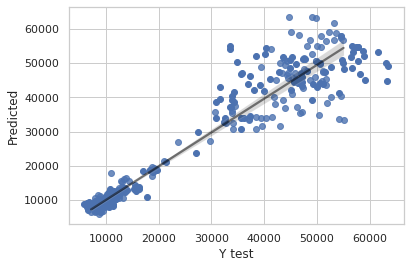

In [ ]:
plt.scatter(y_test, pred)
sns.regplot(pred,y_test,line_kws={'color':'black','alpha':0.5})
plt.ylabel('Predicted')
plt.xlabel('Y test')

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_params = {"n_neighbors" : np.arange(1,11,1)}
knn = KNeighborsRegressor()
#cv is cross-validation
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("optimal K = ", knn_cv_model.best_params_["n_neighbors"])

optimal K =  4


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [ ]:
print("R squared of training: ", knn_model.score(X_train, y_train))
print("R squared of testing: ", knn_model.score(X_test, y_test))

R squared of training:  0.9509492765148082
R squared of testing:  0.9251904963339839


In [ ]:
#Calculating mean square error
difference_array = np.subtract(y_test, pred)
squared_array = np.square(difference_array)
MSE = squared_array.mean()

In [ ]:
print('Mean Square Error: ', MSE)

Mean Square Error:  23867492.876836196


In [ ]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

MAE: 2922.1468597984685
MSE: 23867492.876836196
RMSE: 4885.436815356043


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Y test')

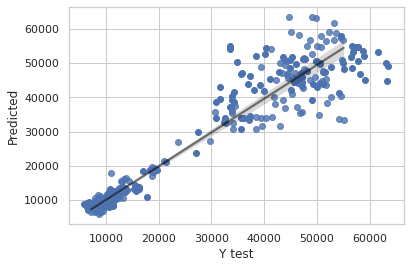

In [ ]:
plt.scatter(y_test, pred)
sns.regplot(pred,y_test,line_kws={'color':'black','alpha':0.5})
plt.ylabel('Predicted')
plt.xlabel('Y test')

#Neural Networks


In [ ]:
import xgboost as xgb
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
model_NN = MLPRegressor(solver='lbfgs', hidden_layer_sizes=30,
                           max_iter=100, random_state=42,
                           activation="relu") 

In [ ]:
model_NN.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=30, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_pred = model_NN.predict(X_test)

In [ ]:
print('R squared of training: ',model_NN.score(X_train, y_train))

R squared of training:  0.9277841381293087


In [ ]:
print('R squared of testing: ',model_NN.score(X_test, y_test))

R squared of testing:  0.9200583681231145


In [ ]:
#Calculating mean square error
difference_array = np.subtract(y_test, pred)
squared_array = np.square(difference_array)
MSE = squared_array.mean()

In [ ]:
print('Mean Square Error: ', MSE)

Mean Square Error:  23867492.876836196


In [ ]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

MAE: 2922.1468597984685
MSE: 23867492.876836196
RMSE: 4885.436815356043


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Y test')

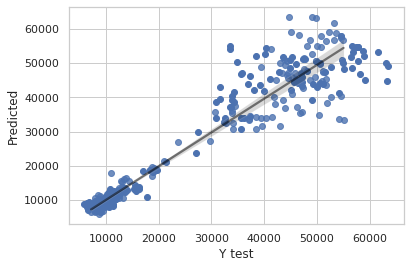

In [ ]:
plt.scatter(y_test, pred)
sns.regplot(pred,y_test,line_kws={'color':'black','alpha':0.5})
plt.ylabel('Predicted')
plt.xlabel('Y test')

In [ ]:
#saving model
#import pickle

#pkl_Filename = "BTC_Prediction_Model.pkl"
#with open(pkl_Filename, 'wb') as file:
#  pickle.dump(reg, file)

# Deployment
URLS

*   Dallas: https://us-south.ml.cloud.ibm.com
*   London - https://eu-gb.ml.cloud.ibm.com
*   Frankfurt - https://eu-de.ml.cloud.ibm.com
*   Tokyo - https://jp-tok.ml.cloud.ibm.com

In [ ]:
!pip install ibm_watson_machine_learning

In [ ]:
from ibm_watson_machine_learning import APIClient

In [ ]:
wml_credentials = {
    "apikey":"3yJs0dfq8sweZcE9-HD02-U0BUXdFerPqonhRXH6Q-1H",
    "url":"https://us-south.ml.cloud.ibm.com",
    #user name(option)
    #password(option)
    "version": "2.0"
}
wml_client = APIClient(wml_credentials)

In [ ]:
wml_client.spaces.list()

In [ ]:
def guid_from_space_name(wml_client, space_name):
    space = wml_client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(wml_client, 'models')

In [ ]:
print("Space UID = ",space_uid)

In [ ]:
wml_client.set.default_space(space_uid)

In [ ]:
wml_client.software_specifications.list()

In [ ]:
software_spec_uid = wml_client.software_specifications.get_uid_by_name("default_py3.7_opence")
software_spec_uid

In [ ]:
model_details = wml_client.repository.store_model(model=reg, meta_props={
    wml_client.repository.ModelMetaNames.NAME:"RD_modeling",
    wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})

model_id = wml_client.repository.get_model_uid(model_details)

In [ ]:
model_id